## Some tips to manipulate time series data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import datetime

### 1. Importing dataframe, parsing string to dates and setting it to index.  

In [2]:
google = pd.read_csv('data/GOOG.csv', parse_dates=['Date'], index_col='Date')

In [3]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-04-11 to 2021-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


### 2. Using DatetimeIndex attributes to check years and weekdays

In [4]:
google.index.year.unique()

Int64Index([2016, 2017, 2018, 2019, 2020, 2021], dtype='int64', name='Date')

In [5]:
google.index.weekday.unique()

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='Date')

### 3. Visualizing data

In [6]:
google_prices = google.iloc[:,0:4]

In [7]:
sns.set(rc={'figure.figsize':(7,5)})

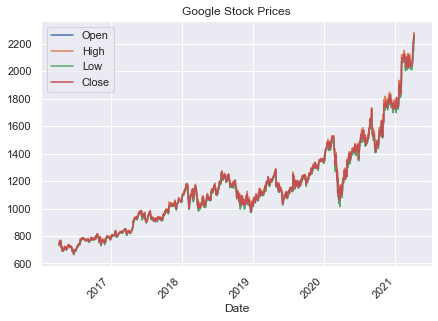

In [8]:
google_prices.plot(title='Google Stock Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [9]:
google_close = google['Close'].to_frame()

In [10]:
google_close.rename(columns={'Close': 'GOOG'}, inplace=True)

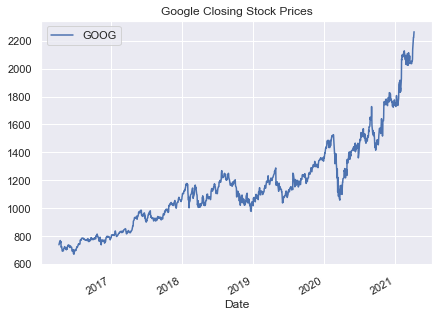

In [11]:
google_close.plot(title='Google Closing Stock Prices')
plt.show()

### 4. Creating lagged and shifted periods

If you need to shift the rows of you dataset, moving it between past or future, the shift function can be very useful for that.
It shifts index by the desired number of periods, and it is useful to calculate various metrics.

In [12]:
# 1 period back in time
google_close['lagged'] = google_close.GOOG.shift(-1)

# 1 period into the future
google_close['shifted'] = google_close.GOOG.shift()

In [13]:
google_close 

,GOOG,lagged,shifted
Date,,,
2016-04-11,736.099976,743.090027,NaN
2016-04-12,743.090027,751.719971,736.099976
2016-04-13,751.719971,753.200012,743.090027
2016-04-14,753.200012,759.000000,751.719971
2016-04-15,759.000000,766.609985,753.200012
...,...,...,...
2021-04-01,2137.750000,2225.550049,2068.629883
2021-04-05,2225.550049,2224.750000,2137.750000
2021-04-06,2224.750000,2249.679932,2225.550049


### 5. Calculating percent change
To calculate the percentage change, the following formula can be used:

$$ 
\frac{X_t}{X_t - 1} * 100
$$


#### Method 1) Using shift(), div(), and sub() functions

In this method, we are going to use the "shifted" column as a support because it contains the period we want to analyze, and we will manually calculate the percent change.

In [14]:
google_close['change'] = google_close.GOOG.div(google_close.shifted)
google_close['pct_change_M1'] = google_close.change.sub(1).mul(100)

In [15]:
google_close.head()

,GOOG,lagged,shifted,change,pct_change_M1
Date,,,,,
2016-04-11,736.099976,743.090027,NaN,NaN,NaN
2016-04-12,743.090027,751.719971,736.099976,1.009496,0.949606
2016-04-13,751.719971,753.200012,743.090027,1.011614,1.161359
2016-04-14,753.200012,759.000000,751.719971,1.001969,0.196887
2016-04-15,759.000000,766.609985,753.200012,1.007700,0.770046


#### Method 2) Using pct_change function
This method performs the same operation as above, but computes the percentage change directly, using the previous row by default. We only need to multiply this operation by 100 at the end. You can see that "pct_change_M1" and "pct_change_M2" have the same value.

In [16]:
google_close['pct_change_M2'] = google_close.GOOG.pct_change().mul(100)

In [17]:
google_close.head()

,GOOG,lagged,shifted,change,pct_change_M1,pct_change_M2
Date,,,,,,
2016-04-11,736.099976,743.090027,NaN,NaN,NaN,NaN
2016-04-12,743.090027,751.719971,736.099976,1.009496,0.949606,0.949606
2016-04-13,751.719971,753.200012,743.090027,1.011614,1.161359,1.161359
2016-04-14,753.200012,759.000000,751.719971,1.001969,0.196887,0.196887
2016-04-15,759.000000,766.609985,753.200012,1.007700,0.770046,0.770046


#### Calculating the percent change with 3 periods difference
The pct_change() method allows you to define the periods. The following example show the percentage change with 3 periods difference.

In [18]:
google_close['pct_change_3D'] = google_close.GOOG.pct_change(periods=3).mul(100)

In [19]:
google_close.head()

,GOOG,lagged,shifted,change,pct_change_M1,pct_change_M2,pct_change_3D
Date,,,,,,,
2016-04-11,736.099976,743.090027,NaN,NaN,NaN,NaN,NaN
2016-04-12,743.090027,751.719971,736.099976,1.009496,0.949606,0.949606,NaN
2016-04-13,751.719971,753.200012,743.090027,1.011614,1.161359,1.161359,NaN
2016-04-14,753.200012,759.000000,751.719971,1.001969,0.196887,0.196887,2.323059
2016-04-15,759.000000,766.609985,753.200012,1.007700,0.770046,0.770046,2.141056


### 6. Calculating difference in value for two periods
The diff function calculates the difference between two periods, and allows us to inform the period we wan to shift to calculate the difference. By default, it uses the previous element.

In [20]:
google_close['diff'] = google_close.GOOG.diff()

In [21]:
google_close.head()

,GOOG,lagged,shifted,change,pct_change_M1,pct_change_M2,pct_change_3D,diff
Date,,,,,,,,
2016-04-11,736.099976,743.090027,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-12,743.090027,751.719971,736.099976,1.009496,0.949606,0.949606,NaN,6.990051
2016-04-13,751.719971,753.200012,743.090027,1.011614,1.161359,1.161359,NaN,8.629944
2016-04-14,753.200012,759.000000,751.719971,1.001969,0.196887,0.196887,2.323059,1.480041
2016-04-15,759.000000,766.609985,753.200012,1.007700,0.770046,0.770046,2.141056,5.799988


#### Difference between 3 days

In [22]:
google_close['diff_3D'] = google_close.GOOG.diff(periods=3)

In [23]:
google_close.head()

,GOOG,lagged,shifted,change,pct_change_M1,pct_change_M2,pct_change_3D,diff,diff_3D
Date,,,,,,,,,
2016-04-11,736.099976,743.090027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-12,743.090027,751.719971,736.099976,1.009496,0.949606,0.949606,NaN,6.990051,NaN
2016-04-13,751.719971,753.200012,743.090027,1.011614,1.161359,1.161359,NaN,8.629944,NaN
2016-04-14,753.200012,759.000000,751.719971,1.001969,0.196887,0.196887,2.323059,1.480041,17.100036
2016-04-15,759.000000,766.609985,753.200012,1.007700,0.770046,0.770046,2.141056,5.799988,15.909973


### 7. Comparing stock performance
To compare stock performance, it is important to normalize the data first. This can be done by dividing all prices by the first value of the data and multiplying them by 100. By doing this, the first value will be equal to 100 and all prices will be relative to the starting point. For instance, from 2016 to April 2021, Google stock prices had an increase of 200 percentage points. 

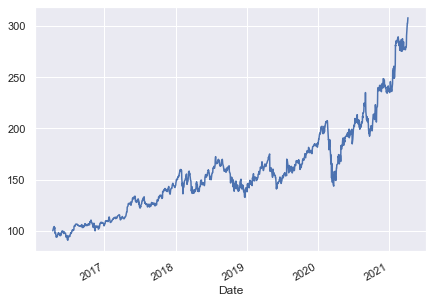

In [24]:
normalized = google_close.GOOG.div(google_close.GOOG.iloc[0]).mul(100)
normalized.plot()
plt.show()

#### Importing other stock prices and SP500 benchmark

In [25]:
aapl = pd.read_csv('data/AAPL.csv', parse_dates=['Date'], index_col='Date')

In [26]:
amzn = pd.read_csv('data/AMZN.csv', parse_dates=['Date'], index_col='Date')

In [27]:
nflx = pd.read_csv('data/NFLX.csv', parse_dates=['Date'], index_col='Date')

In [28]:
sp500 = pd.read_csv('data/HistoricalData_sp500.csv', parse_dates=['Date'], index_col='Date').sort_index()

In [29]:
print("="*55)
print(aapl.info())
print("="*55)

print(amzn.info())
print("="*55)

print(nflx.info())
print("="*55)

print(sp500.info())
print("="*55)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-04-11 to 2021-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-04-11 to 2021-04-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB
None


In [30]:
aapl_close = aapl['Close'].to_frame()
amzn_close = amzn['Close'].to_frame()
nflx_close = nflx['Close'].to_frame()
sp500_close = sp500['Close/Last'].to_frame()

In [31]:
aapl_close.rename(columns={'Close': 'AAPL'}, inplace=True)
amzn_close.rename(columns={'Close': 'AMZN'}, inplace=True)
nflx_close.rename(columns={'Close': 'NFLX'}, inplace=True)
sp500_close.rename(columns={'Close/Last': 'SP500'}, inplace=True)

In [32]:
prices = pd.concat([aapl_close, amzn_close, nflx_close, google_close['GOOG'], sp500_close], axis=1).dropna()

In [33]:
prices.head()

,AAPL,AMZN,NFLX,GOOG,SP500
Date,,,,,
2016-04-11,27.254999,595.929993,102.680000,736.099976,2041.99
2016-04-12,27.610001,603.169983,106.980003,743.090027,2061.72
2016-04-13,28.010000,614.820007,109.650002,751.719971,2082.42
2016-04-14,28.025000,620.750000,110.419998,753.200012,2082.78
2016-04-15,27.462500,625.890015,111.510002,759.000000,2080.73


<AxesSubplot:xlabel='Date'>

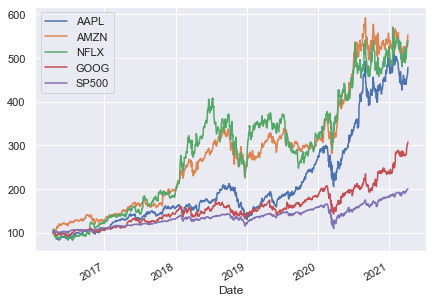

In [34]:
normalized = prices.div(prices.iloc[0]).mul(100)
normalized.plot()

#### Ploting performance difference
Relative to the benchmark, AMZN and NFLX have better performances.

<AxesSubplot:xlabel='Date'>

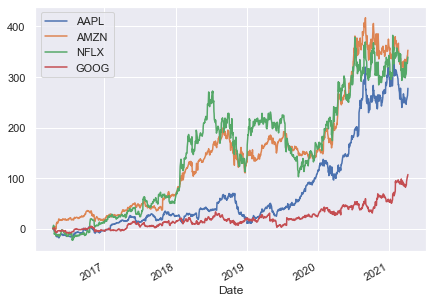

In [35]:
diff = normalized[['AAPL', 'AMZN', 'NFLX', 'GOOG']].sub(normalized['SP500'], axis=0)
diff.plot()

### 8. Rolling window
Useful to perform mathematical operations for sub periods inside the window. This function takes subsets of the data with the same size and allows the calculation of several metrics on them. 

<AxesSubplot:xlabel='Date'>

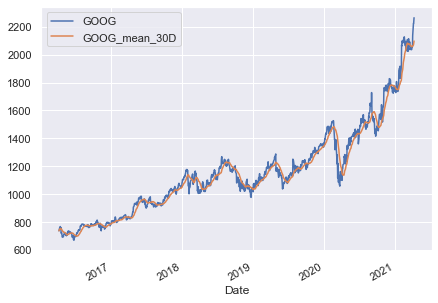

In [36]:
google_close2 = google_close['GOOG'].to_frame()
r30 = google_close2.rolling(window='30D').mean()
google_close2.join(r30.add_suffix('_mean_30D')).plot()

<AxesSubplot:xlabel='Date'>

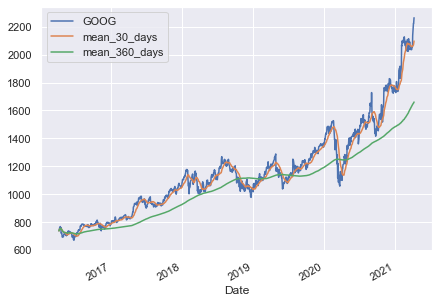

In [37]:
google_close2['mean_30_days'] = r30
r360 = google_close2.GOOG.rolling(window='360D').mean()
google_close2['mean_360_days'] = r360
google_close2.plot()

#### Multiple rolling metrics

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

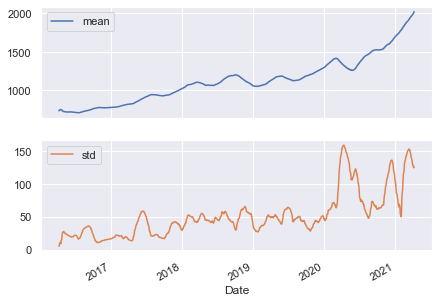

In [38]:
mult_metrics = google_close2.GOOG.rolling('90D').agg(['mean', 'std'])
mult_metrics.plot(subplots=True)

<AxesSubplot:xlabel='Date'>

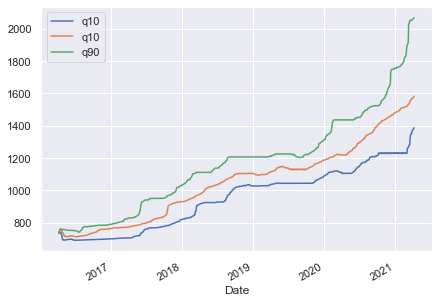

In [39]:
rolling360 = google_close2.GOOG.rolling('360D')
q10 = rolling360.quantile(0.1).to_frame('q10')
median = rolling360.median().to_frame('q10')
q90 = rolling360.quantile(0.9).to_frame('q90')

pd.concat([q10, median, q90], axis=1).plot()

### 9. Expanding windows
This method provides expanding transformations, in which the output is a cumulative value based on all previous data points. The following examples demonstrates the cumulative sum using two different functions.

In [40]:
# the basic idea: comparing expanding() with cumsum()

google_close2['expanding'] = google_close2.GOOG.expanding().sum()
google_close2['cumulative'] = google_close2.GOOG.cumsum()
google_close2[['GOOG', 'expanding', 'cumulative']].head()

,GOOG,expanding,cumulative
Date,,,
2016-04-11,736.099976,736.099976,736.099976
2016-04-12,743.090027,1479.190003,1479.190003
2016-04-13,751.719971,2230.909974,2230.909974
2016-04-14,753.200012,2984.109986,2984.109986
2016-04-15,759.000000,3743.109986,3743.109986


#### Calculating Multi-Period Returns:
Besides the cumulative sum, there are many other methods that can be used to produce new cumulative data points, such as cumprod(), cummin(), cummax(), etc. The code below calculates the cumulative return of SP500. It demonstrates how to implement the "Multi-Period Returns" formula using the pandas built-in functions.

In [41]:
sp500_close2 = sp500_close.sort_index()

<AxesSubplot:xlabel='Date'>

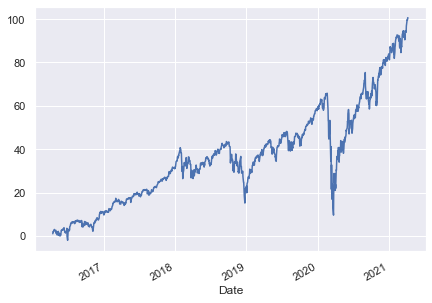

In [42]:
pc = sp500_close2.SP500.pct_change()
pc_plus_one = pc.add(1)
cumulative_return = pc_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

#### Expanding minimum and maximun
The expanding() .min() and .max() holds the minimun and maximum values of previous rows up to the current point.

<AxesSubplot:xlabel='Date'>

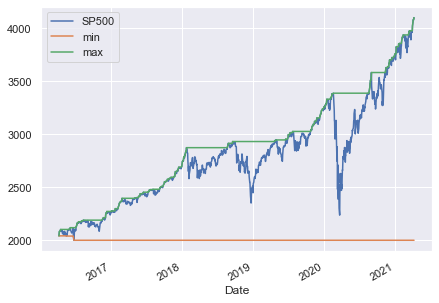

In [43]:
sp500_close2['min'] = sp500_close2.SP500.expanding().min()
sp500_close2['max'] = sp500_close2.SP500.expanding().max()
sp500_close2.plot()